In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
# read table

dataPayment = '../Datasets/Employee_Payroll.csv'
payroll = pd.read_csv(dataPayment)

# set default value to 0 for NaN numerical data
payroll.fillna(0, inplace=True)
payroll['Office'] = payroll['Office'].astype(int)

# define column for 1/4 year discretization
payroll['Fiscal Quarter'] = payroll['Fiscal Quarter']*0.25 - 0.25
payroll['Fiscal Period'] = payroll['Fiscal Year'] + payroll['Fiscal Quarter']

pd.to_datetime(payroll['Original Hire Date'])

# parse hire date to get hire year
payroll['Original Hire Date'] = payroll['Original Hire Date'].str.split('/').str[2]
payroll['Original Hire Date'] = payroll['Original Hire Date'].astype(int)

_work_year = payroll["Fiscal Period"] - payroll['Original Hire Date']

In [3]:
payroll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234299 entries, 0 to 234298
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Fiscal Year          234299 non-null  int64  
 1   Fiscal Quarter       234299 non-null  float64
 2   Fiscal Period        234299 non-null  float64
 3   First Name           234299 non-null  object 
 4   Last Name            234299 non-null  object 
 5   Middle Init          234299 non-null  object 
 6   Bureau               234299 non-null  object 
 7   Office               234299 non-null  int32  
 8   Office Name          234299 non-null  object 
 9   Job Code             234299 non-null  int64  
 10  Job Title            234299 non-null  object 
 11  Base Pay             234299 non-null  float64
 12  Position ID          234299 non-null  int64  
 13  Employee Identifier  234299 non-null  object 
 14  Original Hire Date   234299 non-null  int32  
dtypes: float64(3), in

In [4]:
# specify table column included

payroll = payroll[['Fiscal Year', 'Fiscal Period', 'Job Code', 'Base Pay', 'Position ID', 'Employee Identifier']]

# add Working Year Column
payroll["Working Year"] = _work_year

payroll.head(20)

,Fiscal Year,Fiscal Period,Job Code,Base Pay,Position ID,Employee Identifier,Working Year
0,2016,2016.00,1172,20088.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,11.00
1,2016,2016.25,1172,23436.00,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,11.25
2,2016,2016.50,1172,20422.82,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,11.50
3,2016,2016.75,1172,23904.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,11.75
4,2017,2017.00,1172,20745.80,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,12.00
5,2017,2017.25,1172,24473.38,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,12.25
6,2017,2017.50,1172,21217.35,9510200,6ac7ba3e-d286-44f5-87a0-191dc415e23c,12.50
7,2016,2016.00,5049,17770.86,9500731,f313b1c3-1b1a-4b07-bb75-a8c850a91bac,18.00
8,2016,2016.25,5049,20800.67,9500731,f313b1c3-1b1a-4b07-bb75-a8c850a91bac,18.25
9,2016,2016.50,5049,17873.76,9500731,f313b1c3-1b1a-4b07-bb75-a8c850a91bac,18.50


In [15]:
df = payroll.drop(['Employee Identifier'], axis=1)
corr = df.corr()

corr
# fig = plt.figure(figsize=(8,8))
# plt.matshow(corr, cmap='RdBu', fignum=fig.number)
# plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
# plt.yticks(range(len(corr.columns)), corr.columns);

,Fiscal Year,Fiscal Period,Job Code,Base Pay,Position ID,Working Year
Fiscal Year,1.000000,0.934680,0.075308,-0.028770,-0.103243,0.002762
Fiscal Period,0.934680,1.000000,0.077657,0.009332,-0.096404,0.002243
Job Code,0.075308,0.077657,1.000000,0.083556,-0.131827,-0.123557
Base Pay,-0.028770,0.009332,0.083556,1.000000,0.009403,0.107876
Position ID,-0.103243,-0.096404,-0.131827,0.009403,1.000000,0.284174
Working Year,0.002762,0.002243,-0.123557,0.107876,0.284174,1.000000


In [5]:
group_1172 = payroll.groupby(['Job Code']).get_group(1172)

# grouped1 = group_1172.groupby(['Fiscal Period']).get_group(2016.0)
# grouped2 = group_1172.groupby(['Fiscal Period']).get_group(2016.25)

_sorted = group_1172.sort_values('Employee Identifier')
pd.pivot_table(_sorted, values='Base Pay', index=['Fiscal Period'], columns='Employee Identifier')

Employee Identifier,007ca4de-de2b-44ac-bf71-6eb4cbdc27e2,00d20c14-93d4-4560-a10d-3e41c1fafd07,00d3e7d2-9397-4a16-a556-80056ebbf456,00e833c8-ecbf-4e2c-9b66-9472d1949d79,01143446-4dfb-4327-840d-fb8b88fe78c3,0163b34b-b1d9-4b9c-aa9e-90df3b8fd9af,017d1eb1-6574-48f1-9bd9-536eb23a2219,019f5fbb-4afd-4bd7-a254-eb03660a979f,01ee96aa-5bdb-4694-b3cb-be2a2960a4d2,028d2bca-7dab-4294-a9fc-f4371956438b,...,feafd46f-ba8a-41c0-b72e-0cc961d66b01,feb07f2b-e7cd-40ec-9b95-103ef2246d6c,febdb26a-8424-438a-8a5d-fbc3c17d1ab5,fecb6d8c-da1b-4752-a4d4-14de89f24c46,feccda27-41c4-475e-8f78-cc16adff92b2,fef3a6ad-266b-44b5-96f5-2952dc364b38,ff131ab6-ce88-43ad-b6c1-64507471dc08,ff3dd422-b4e5-4b17-87be-23a558efb62e,ff9f0a14-2aa1-4ff5-8ad2-8b4db9a3d719,ffa8ef63-a6ed-49c2-8b32-f4bbbba79851
Fiscal Period,,,,,,,,,,,,,,,,,,,,,
2016.00,16129.410,15498.23,7155.09,25521.60,22305.11,16129.41,23329.89,16954.99,27780.00,19206.72,...,NaN,21865.41,28480.800,15192.49,NaN,21865.39,14892.48,30087.41,14892.49,27780.000
2016.25,18817.660,18081.28,16695.26,29775.20,26022.63,18817.67,27218.23,19780.87,32410.00,22407.83,...,NaN,25509.67,33227.600,17724.57,NaN,25509.64,17374.57,35101.92,17374.57,32410.000
2016.50,16398.240,15756.64,14548.63,25946.80,22676.71,16398.22,23718.73,17237.43,28243.20,19526.71,...,NaN,18512.72,14854.645,15445.67,NaN,22229.82,15140.90,30588.98,15140.90,18797.870
2016.75,13710.000,18443.04,12163.60,30370.45,26542.82,19194.00,27762.57,20176.23,33058.47,22855.81,...,NaN,NaN,39168.030,18079.04,NaN,26019.82,17722.36,35804.17,17722.36,NaN
2017.00,NaN,16005.91,NaN,26357.05,23035.42,16657.59,24094.08,19934.59,28689.82,19835.52,...,NaN,NaN,33992.250,15848.31,11538.46,22581.53,15380.59,31072.88,15380.60,NaN
2017.25,NaN,18719.68,NaN,30825.76,26941.01,19481.81,28747.03,23314.48,33745.76,23198.57,...,12139.92,NaN,39755.540,18719.68,40384.61,26410.18,18143.38,36341.20,18078.46,NaN
2017.50,NaN,16045.44,NaN,26422.03,23092.31,16698.70,24640.33,19983.82,29048.16,19884.51,...,22412.16,NaN,34076.180,16045.44,34615.38,22637.28,15728.61,31149.60,15495.79,NaN
2017.75,NaN,18500.74,NaN,30554.13,26936.80,19203.53,28336.37,23176.07,33405.40,22867.17,...,25773.98,NaN,39187.580,18452.26,39807.69,26252.82,18087.85,35822.04,17820.18,NaN
2018.00,10159.735,16575.31,NaN,NaN,23558.40,19043.87,24743.14,20386.61,14524.10,19884.51,...,22599.76,24743.20,34218.220,16411.68,11538.46,23768.46,15926.40,31541.60,15624.64,14524.105


<Axes: xlabel='Working Year', ylabel='Base Pay'>

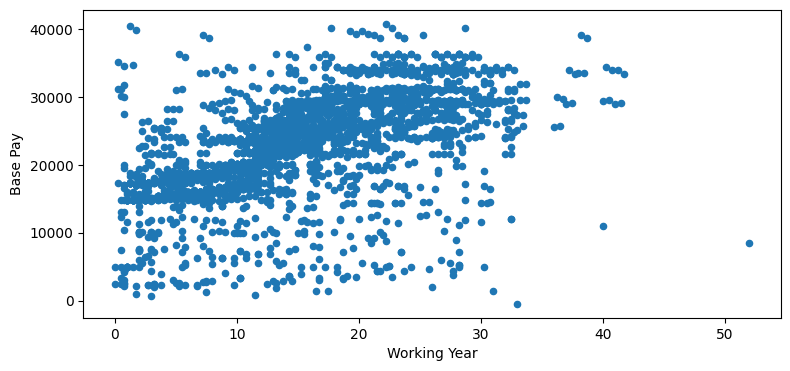

In [6]:
grouped = group_1172.groupby(['Fiscal Year']).get_group(2017)
grouped.plot(kind='scatter', x='Working Year', y='Base Pay', figsize=(9, 4))

<Axes: xlabel='Fiscal Period', ylabel='Base Pay'>

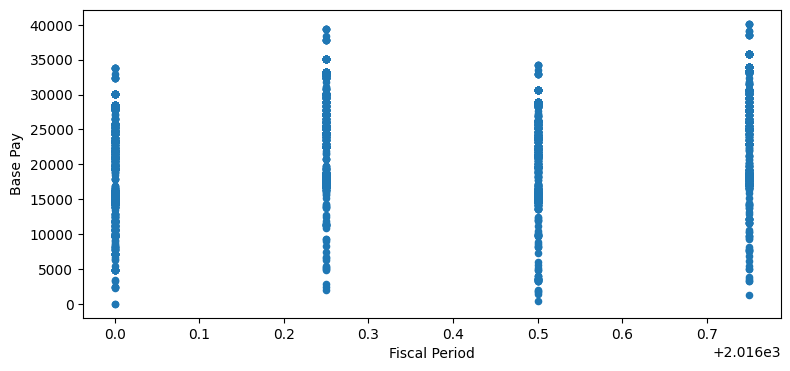

In [7]:
grouped = group_1172.groupby(['Fiscal Year']).get_group(2016)
grouped.plot(kind='scatter', x='Fiscal Period', y='Base Pay', figsize=(9, 4))

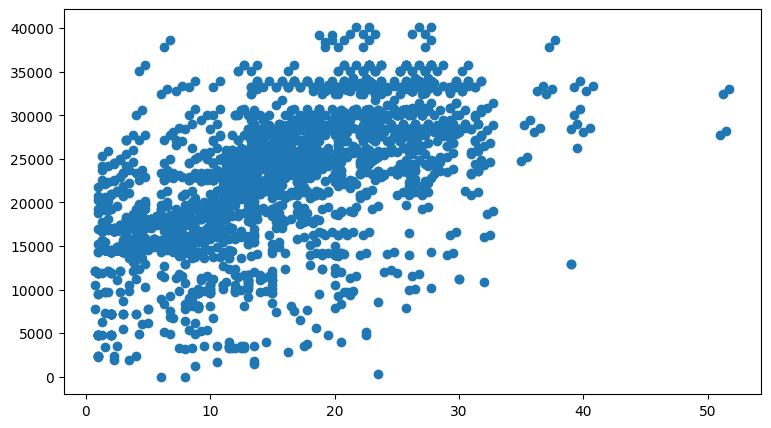

In [8]:
fig, ax = plt.subplots(figsize =(9,5))
ax.scatter(grouped['Working Year'], grouped['Base Pay'])

plt.show()

In [9]:
arr = []


try:
    with open('../cache/ids.txt', "r") as f:
        for _id in f:
            arr.append(int(_id))
except:
    if not os.path.exists('../cache'):
        os.mkdir('../cache')
        
    _index = payroll['Job Code'].unique()
    for _id in _index:
        counts = len(payroll.groupby(['Job Code']).get_group(_id))
        if counts > 1000:
            arr.append(str(_id))
    with open('cache/ids.txt', 'w') as f:
        for _id in arr:
            f.write('%s\n' % _id) 
finally:
   f.close()

# :return : <List> arr : list of unique job id

In [10]:
# for val in arr:
#     new_df = payroll[payroll['Job Code'] == val]
#     print(f"DataFrame for job code {val}:")
#     display(new_df)